In [1]:
import sys
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import math

In [2]:
base_path = '/Users/krc/Documents/breast_dacon'

train_df = pd.read_csv('/Users/krc/Documents/breast_dacon/open/train.csv')
test_df = pd.read_csv('/Users/krc/Documents/breast_dacon/open/test.csv')

In [3]:
img_path = base_path + train_df['img_path'].iloc[13][1:]
mask_path = base_path + train_df['mask_path'].iloc[13][1:]
mask_path

'/Users/krc/Documents/breast_dacon/train_masks/BC_01_0015.png'

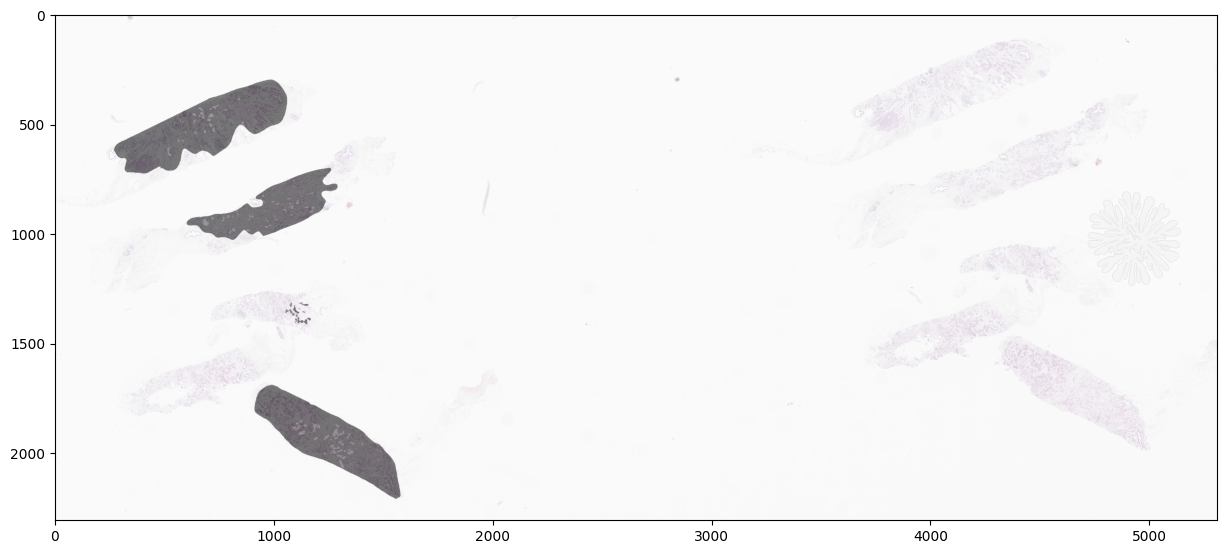

In [4]:
image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
mask = cv2.imread(mask_path)

plt.figure(figsize = (15,10))

plt.imshow(image, alpha =0.7)
plt.imshow(mask, alpha =0.5)
plt.show()

In [5]:
# mask 가 있는 사진 리스트 
have_mask = train_df[train_df['mask_path'] != '-' ]

mask_list = have_mask.mask_path.values.tolist()
have_mask

,ID,img_path,mask_path,나이,수술연월일,진단명,암의 위치,암의 개수,암의 장경,NG,...,ER_Allred_score,PR,PR_Allred_score,KI-67_LI_percent,HER2,HER2_IHC,HER2_SISH,HER2_SISH_ratio,BRCA_mutation,N_category
13,BC_01_0015,./train_imgs/BC_01_0015.png,./train_masks/BC_01_0015.png,43,2019-02-11,4,1,2,13.0,2.0,...,7.0,1.0,8.0,10.01,0.0,2.0,0.0,1.23,NaN,0
80,BC_01_0397,./train_imgs/BC_01_0397.png,./train_masks/BC_01_0397.png,60,2020-01-08,1,2,1,23.0,2.0,...,7.0,1.0,6.0,20.22,0.0,0.0,NaN,NaN,NaN,1
81,BC_01_0398,./train_imgs/BC_01_0398.png,./train_masks/BC_01_0398.png,58,2019-12-12,1,2,1,13.0,2.0,...,8.0,1.0,5.0,20.93,0.0,1.0,NaN,NaN,NaN,1
82,BC_01_0404,./train_imgs/BC_01_0404.png,./train_masks/BC_01_0404.png,72,2019-12-26,1,2,1,13.0,2.0,...,7.0,1.0,8.0,6.38,0.0,1.0,NaN,NaN,NaN,1
84,BC_01_0417,./train_imgs/BC_01_0417.png,./train_masks/BC_01_0417.png,51,2019-12-05,1,2,2,21.0,2.0,...,7.0,0.0,NaN,18.86,0.0,2.0,0.0,1.27,NaN,1
86,BC_01_0425,./train_imgs/BC_01_0425.png,./train_masks/BC_01_0425.png,46,2019-12-12,4,1,1,5.0,1.0,...,6.0,1.0,6.0,4.60,0.0,2.0,0.0,1.10,NaN,0
88,BC_01_0451,./train_imgs/BC_01_0451.png,./train_masks/BC_01_0451.png,33,2019-11-05,1,2,2,22.0,3.0,...,6.0,1.0,4.0,44.92,0.0,2.0,0.0,1.42,NaN,1
89,BC_01_0454,./train_imgs/BC_01_0454.png,./train_masks/BC_01_0454.png,62,2019-10-22,1,1,1,13.0,2.0,...,7.0,1.0,6.0,11.84,0.0,2.0,0.0,1.32,NaN,1
90,BC_01_0455,./train_imgs/BC_01_0455.png,./train_masks/BC_01_0455.png,46,2019-10-07,1,2,1,14.0,2.0,...,7.0,1.0,8.0,16.37,0.0,1.0,NaN,NaN,NaN,1
91,BC_01_0457,./train_imgs/BC_01_0457.png,./train_masks/BC_01_0457.png,44,2019-10-30,2,2,2,40.0,2.0,...,7.0,1.0,6.0,2.60,0.0,1.0,NaN,NaN,NaN,1


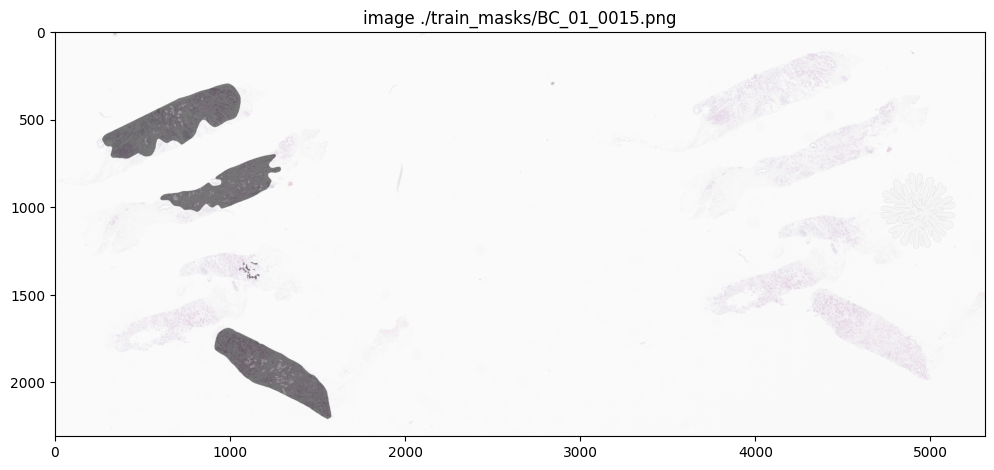

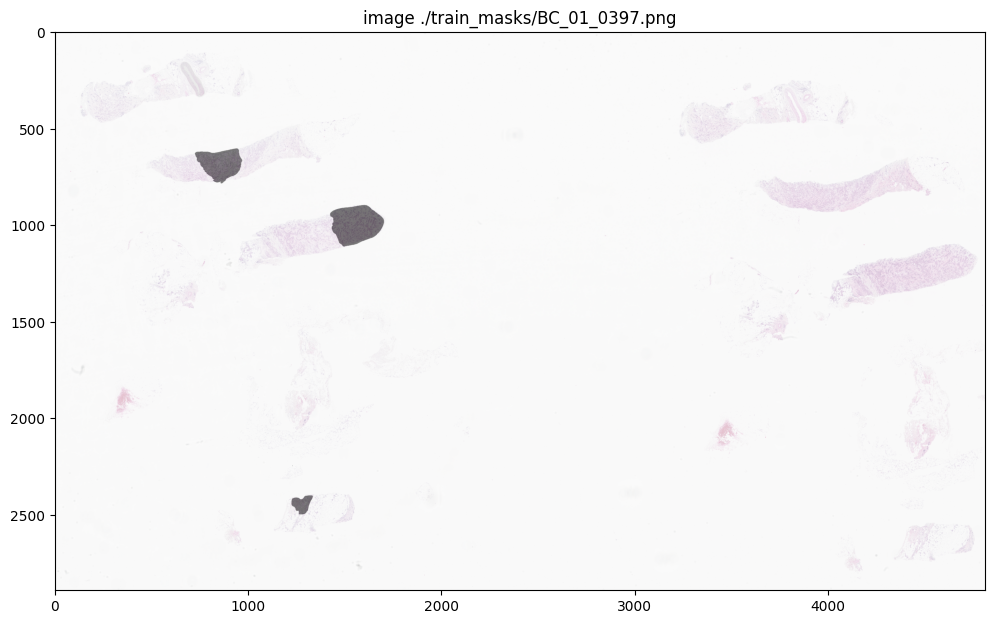

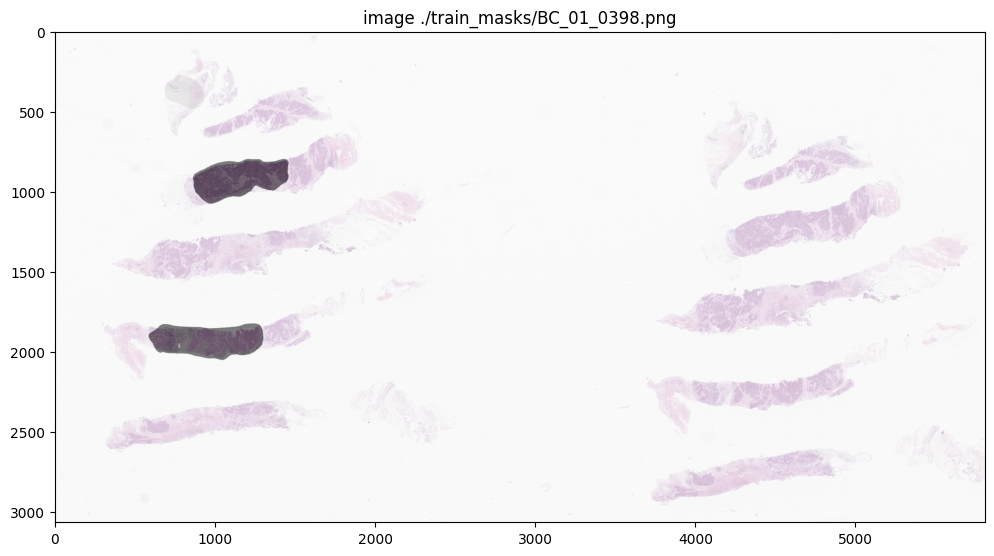

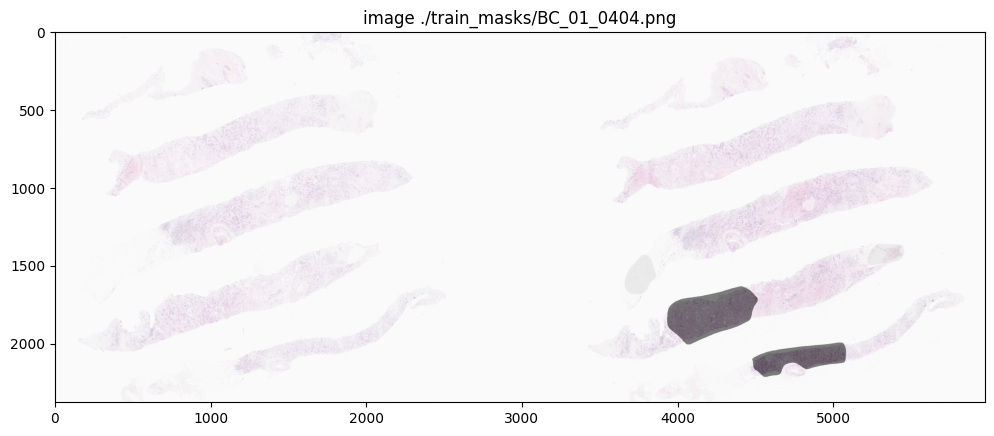

KeyboardInterrupt: 

In [6]:
#mask image와 원본 이미지  겹쳐서  확인

for idx, img in enumerate(mask_list):
    only_img_path = base_path + have_mask['img_path'].iloc[idx][1:]
    only_mask_path = base_path + img[1:]
    image = cv2.imread(only_img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    mask = cv2.imread(only_mask_path)
    #mask = cv2.cvtColor(mask, cv2.COLOR_GRAYSCALE)
    plt.figure(figsize = (12,8))
    
    plt.title(f'image {img}')
    plt.imshow(image, alpha =0.7)
    plt.imshow(mask, alpha =0.5)
    plt.show()

In [7]:
#line detect function

def line_detect():
    default_file = base_path + train_df['img_path'].iloc[13][1:]
    # filename = argv[0] if len(argv) > 0 else default_file

    # load image
    src = cv2.imread(default_file)

    # load success check
    if src is None:
        print("Error opening image")
        print("Usage: houghline_example.py" + default_file)
        return -1

    dst = cv2.Canny(src, 90, 190, None, 3)  # optimized in milk 019

    # Copy edges to the images that will dispaly the results in BGR
    cdst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
    cdstP = np.copy(cdst)

    lines = cv2.HoughLines(dst, 1, np.pi / 180, 150, None, 0, 0)

    if lines is not None:
        for i in range(0, len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            a = math.cos(theta)
            b = math.sin(theta)
            x0 = a * rho
            y0 = b * rho
            pt1 = (int(x0 + 1000 * (-b)), int(y0 + 1000 * (a)))
            pt2 = (int(x0 - 1000 * (-b)), int(y0 - 1000 * (a)))
            cv2.line(cdst, pt1, pt2, (0, 0, 255), 2, cv2.LINE_AA)

    linesP = cv2.HoughLinesP(dst, 1, np.pi / 180, 50, None, 50, 10)

    if linesP is not None:
        for i in range(0, len(linesP)):
            li = linesP[i][0]
            cv2.line(cdstP, (li[0], li[1]), (li[2], li[3]), (0, 0, 255), 2, cv2.LINE_AA)

    fig, ax = plt.subplots(1,3, figsize = (30,20)) 

    ax[0].imshow(src)
    ax[1].imshow(cdst)
    ax[2].imshow(cdstP)

    plt.show()


In [8]:
# 배경 투명화 -  alpha 채널 추가

def bg_delete(file_path):

    file_list = os.walk(file_path)  # OS로 불러오기
    img_files = [file for file in file_list if file[-1][-1].endswith(".png")]
    

    if not img_files:  # if empty folder
        print("there are no png files")
        sys.exit()

    for i, f in enumerate(img_files[0][2]):
        # t.ly/zgLP
        orig_image = cv2.imread(file_path + f)  
        result = orig_image.copy()
        orig_image = cv2.cvtColor(orig_image, cv2.COLOR_BGR2RGB)
        gray_sample = cv2.cvtColor(orig_image, cv2.COLOR_RGB2GRAY)

        # masked image 
        mask = cv2.threshold(gray_sample, 239, 255, cv2.THRESH_BINARY)[1]
        mask = 255 - mask

        kernel = np.ones((3,3), np.uint8)
        mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
        mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

        mask = cv2.GaussianBlur(mask, (0,0), sigmaX=2, sigmaY = 2, borderType = cv2.BORDER_DEFAULT)

        #linear stretch - 이건 뭔말인지..
        mask = (2*(mask.astype(np.float32)) - 255.0).clip(0,255).astype(np.uint8)



        result = cv2.cvtColor(result, cv2.COLOR_BGR2BGRA)
        result[:,:,3] = mask
    print('done')
    return result

#         fg, ax = plt.subplots(1,2, figsize = (20,15))

#         ax[0].imshow(gray_sample) #, cmap = 'gray')
#         ax[1].imshow(result, cmap = 'gray')
#         plt.show()

--- 

## resize (background delete) - K means - score evaluation - apply crop

In [9]:
#Kmeans function

from numpy.linalg import norm
import copy 

#From t.ly/TLq_


class KMeans():
    def __init__(self, n_clusters, max_iter = 20, random_state = 60):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state
        
    def initialize_centroids(self, X): # center 초기화 - 이미지 내 특정 점으로 고정
        np.random.RandomState(self.random_state)
        random_idx = np.random.permutation(X.shape[0])
        centroids = X[random_idx[:self.n_clusters]]

        return centroids
        
    def compute_centroids(self, X, labels): # centroids 계산 
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            centroids[k, :] = np.mean(X[labels == k, :], axis=0)
        return centroids
        
    def compute_distance(self, X, centroids): #
        distance = np.zeros((X.shape[0], self.n_clusters))
        for k in range(self.n_clusters):
            row_norm = norm(X - centroids[k, :], axis=1)
            distance[:, k] = np.square(row_norm)
        return distance
    
    def find_closest_cluster(self, distance):
        return np.argmin(distance, axis=1)
    
    def compute_sse(self, X, labels, centroids):
        distance = np.zeros(X.shape[0])
        for k in range(self.n_clusters):
            distance[labels == k] = norm(X[labels == k] - centroids[k], axis=1)
        return np.sum(np.square(distance))
    
    def fit(self, X):
        self.centroids = self.initialize_centroids(X)
 
        for i in range(self.max_iter):
            old_centroids = self.centroids
            distance = self.compute_distance(X, old_centroids)
            self.labels = self.find_closest_cluster(distance)
            self.centroids = self.compute_centroids(X, self.labels)
            if np.all(old_centroids == self.centroids):
                break
        self.error = self.compute_sse(X, self.labels, self.centroids)
        # return self.labels
        
    def predict(self, X):
        distance = self.compute_distance(X, self.centroids)
        return self.find_closest_cluster(distance)

In [13]:
os.getcwd()

'/Users/krc/Documents/breast_dacon/dacon_bc_prediction/image_eda'

In [14]:
import crop_image

In [15]:
score_dacon = crop_image.crop_from('/Users/krc/Documents/breast_dacon/train_imgs/', print_imgs=False)

score_df = pd.DataFrame.from_dict(score_dacon, orient='index', columns = ['K=4','K=3','K=2'])
score_df

K =  4 avg_score: 0.46038848
K =  3 avg_score: 0.48830158


KeyboardInterrupt: 

In [ ]:
score_df.to_csv('./k_values_train.csv')

In [ ]:
# ## test

# file_path = '/Users/krc/Documents/breast_dacon/test_imgs/'
# file_list = os.walk(file_path)  # OS로 불러오기
# img_files = [file for file in file_list if file[-1][-1].endswith(".png")]

# score_dict = {}

# if not img_files:  # if empty folder
#     print("there are no png files")
#     sys.exit()

# for i, f in enumerate(img_files[0][2]):
#     # t.ly/zgLP
#     score_list = []
#     image = cv2.imread(file_path + f)
#     y_orig, x_orig, channel= image.shape
#     if x_orig / y_orig < 1.5:
#         print(f'{f} is not cropped')
#         score_dict[f] = copy.deepcopy(score_list)
#         score_list.clear()
#         continue
#     gray_sample = image.copy()
#     gray_sample = cv2.cvtColor(gray_sample, cv2.COLOR_RGB2GRAY)
    
#     # 모양 맞추기 flip 
#     gray_sample =cv2.flip(gray_sample, 0)
#     # resize to 400 * 200
#     gray_sample = cv2.resize(gray_sample, dsize=(400, 200), interpolation=cv2.INTER_LINEAR) 
    
#     #전처리
#     coord = np.where( gray_sample < 239 )
#     co_array = np.array(coord)
#     co_array = np.float32(co_array).T
#     from sklearn.metrics import silhouette_samples, silhouette_score

#     best_score = 0
#     best_k = 1
#     best_centroids = []

#     for j, k in enumerate([ 4, 3, 2]):

#         # Run the Kmeans algorithm
#         km = KMeans(n_clusters=k)
#         km.fit(co_array)
#         labels = km.predict(co_array) # input data

#         centroids = km.compute_centroids(co_array, labels) # cluster_centers_
#         # Get silhouette samples
#         silhouette_vals = silhouette_samples(co_array, labels)

#         # Get the average silhouette score and plot it
#         avg_score = np.mean(silhouette_vals) ## score 
#         score_list.append(avg_score)
#         print('K = ',k, 'avg_score:', avg_score)

#         if best_score < avg_score:
#             if best_k == 3 and k ==2 and (avg_score-best_score) < 0.09:
#                 break
#             best_score = avg_score
#             best_k = k
#             best_centroids = centroids
#             x_coord = centroids[ : , 1]
#             x_coord.sort()        
#             if best_k == 2:
#                 x1, x2 = x_coord
#             elif best_k ==3  :
#                 x1, x2, x3 = x_coord
#             elif best_k ==4  :
#                 x1, x2, x3, x4 = x_coord

#     score_dict[f] = copy.deepcopy(score_list)
#     score_list.clear()
#     if best_k == 2:
#         crop_image = image[:, : int( (x1+x2)/2  *x_orig / 400 ), :]
#     elif best_k > 2:
#         # crop_image = image[:, int((x1+x2)/2 * x_orig/400): int((x2+x3/2)*x_orig/400), : ]
#         # crop_image = image[:, int((x1+x3)/2 * x_orig/400) : , : ] #x1, x3 사이가 중간점
#         alpha = int(y_orig / 2)
#         crop_image = image[:, max(0, int(x2 *x_orig /400) -alpha)  :int(x2 *x_orig /400) +alpha , : ] ## 마이너스나옴 

        
#     print(best_centroids)
#     #plt.title(f'{f} image result')
#     #plt.imshow(crop_image)
#     #plt.show()
    
    

K =  4 avg_score: 0.42782277
K =  3 avg_score: 0.54422694
K =  2 avg_score: 0.6754943
[[ 80.57754517  90.88090515]
 [ 81.57243347 313.46524048]]
K =  4 avg_score: 0.5405995
K =  3 avg_score: 0.57565576
K =  2 avg_score: 0.71842456
[[109.39730835  82.82147217]
 [ 86.73230743 324.6055603 ]]
K =  4 avg_score: 0.47802854
K =  3 avg_score: 0.54673624
K =  2 avg_score: 0.5297313
[[ 99.33319855  67.33683777]
 [ 85.88001251 199.85195923]
 [129.32981873 328.97756958]]
K =  4 avg_score: 0.46591598
K =  3 avg_score: 0.5274352
K =  2 avg_score: 0.53266627
[[114.67102051  76.1098938 ]
 [ 73.74420166 209.06710815]
 [ 82.57502747 337.3862915 ]]
K =  4 avg_score: 0.5274931
K =  3 avg_score: 0.58972186
K =  2 avg_score: 0.5409297
[[ 70.55987549  70.67068481]
 [140.08242798 212.13838196]
 [103.12400818 353.17224121]]
K =  4 avg_score: 0.5334784
K =  3 avg_score: 0.53891087
K =  2 avg_score: 0.6984153
[[106.22962952 101.93946075]
 [ 89.21021271 318.51965332]]
K =  4 avg_score: 0.525753
K =  3 avg_score: 

K =  3 avg_score: 0.5536304
K =  2 avg_score: 0.73437166
[[100.38461304  81.39974213]
 [ 94.99377441 322.66479492]]
K =  4 avg_score: 0.36467576
K =  3 avg_score: 0.4246739
K =  2 avg_score: 0.5968979
[[ 88.30187225 103.7375946 ]
 [ 93.89350128 299.03790283]]
K =  4 avg_score: 0.41678405
K =  3 avg_score: 0.54517853
K =  2 avg_score: 0.6837266
[[ 97.91233826  77.13354492]
 [108.31481171 314.11297607]]
K =  4 avg_score: 0.5024105
K =  3 avg_score: 0.5575295
K =  2 avg_score: 0.5182816
[[ 88.25179291  61.84961319]
 [123.57367706 201.67312622]
 [104.61499023 340.74453735]]
K =  4 avg_score: 0.4680257
K =  3 avg_score: 0.48571452
K =  2 avg_score: 0.64475554
[[108.86280823  95.83592987]
 [ 87.56502533 310.4362793 ]]
K =  4 avg_score: 0.40533194
K =  3 avg_score: 0.537926
K =  2 avg_score: 0.6773433
[[100.10471344  84.11276245]
 [100.15366364 314.44482422]]
K =  4 avg_score: 0.37286252
K =  3 avg_score: 0.45158696
K =  2 avg_score: 0.5540554
[[ 95.17688751  95.76373291]
 [ 77.20300293 297.7

K =  3 avg_score: 0.5298933
K =  2 avg_score: 0.49750882
[[ 89.32711029  59.60676193]
 [ 91.97618103 197.61849976]
 [ 89.65239716 337.40475464]]
K =  4 avg_score: 0.44876242
K =  3 avg_score: 0.4910642
K =  2 avg_score: 0.5256429
[[ 84.62719727  77.54418945]
 [121.21901703 205.26817322]
 [ 96.61009979 336.43325806]]
K =  4 avg_score: 0.44671315
K =  3 avg_score: 0.47277927
K =  2 avg_score: 0.5181486
[[108.2681427   73.63078308]
 [101.25117493 208.48118591]
 [109.39443207 342.72839355]]
K =  4 avg_score: 0.47018257
K =  3 avg_score: 0.503439
K =  2 avg_score: 0.63210726
[[123.27202606  85.53067017]
 [105.51189423 306.60861206]]
K =  4 avg_score: 0.39054963
K =  3 avg_score: 0.4997804
K =  2 avg_score: 0.6286861
[[109.5229187   86.86276245]
 [110.84053802 297.81655884]]
K =  4 avg_score: 0.426014
K =  3 avg_score: 0.36561623
K =  2 avg_score: 0.55763656
[[115.27519989 108.54636383]
 [ 89.37373352 295.34005737]]
K =  4 avg_score: 0.4520996
K =  3 avg_score: 0.48422703
K =  2 avg_score: 0

K =  3 avg_score: 0.5515946
K =  2 avg_score: 0.68724585
[[ 99.45728302  82.94282532]
 [ 95.62382507 313.01040649]]
K =  4 avg_score: 0.5516258
K =  3 avg_score: 0.58625615
K =  2 avg_score: 0.6798511
[[ 95.95397186 105.06684113]
 [ 89.73701477 328.41983032]]
K =  4 avg_score: 0.49502018
K =  3 avg_score: 0.5555034
K =  2 avg_score: 0.5163314
[[ 65.24853516  57.22843552]
 [ 68.292099   198.89360046]
 [ 68.40727234 339.95071411]]
K =  4 avg_score: 0.41536433
K =  3 avg_score: 0.50843143
K =  2 avg_score: 0.6368224
[[105.31822205  91.67931366]
 [ 89.4740448  305.29724121]]
K =  4 avg_score: 0.57413584
K =  3 avg_score: 0.5580866
K =  2 avg_score: 0.7170198
[[ 95.64241028  84.33718109]
 [108.01215363 308.99526978]]
K =  4 avg_score: 0.44008112
K =  3 avg_score: 0.46261913
K =  2 avg_score: 0.5139824
[[ 93.08557892  57.36155319]
 [ 98.13032532 188.97116089]
 [113.57057953 321.73599243]]
K =  4 avg_score: 0.35620022
K =  3 avg_score: 0.4639851
K =  2 avg_score: 0.59552526
[[101.77077484 104

K =  4 avg_score: 0.4570677
K =  3 avg_score: 0.580199
K =  2 avg_score: 0.7151578
[[105.75109863  86.8434906 ]
 [ 91.65933228 312.63046265]]
K =  4 avg_score: 0.50090903
K =  3 avg_score: 0.62859946
K =  2 avg_score: 0.5693428
[[129.4029541   65.75426483]
 [ 71.29496765 199.85943604]
 [ 98.10579681 339.30963135]]
K =  4 avg_score: 0.4543264
K =  3 avg_score: 0.5843125
K =  2 avg_score: 0.7163221
[[ 86.42458344  70.86619568]
 [ 98.08226776 320.17227173]]
K =  4 avg_score: 0.44765717
K =  3 avg_score: 0.47867876
K =  2 avg_score: 0.51056254
[[101.61916351  73.64331055]
 [ 93.91474915 208.32452393]
 [ 97.65916443 341.46343994]]
K =  4 avg_score: 0.459724
K =  3 avg_score: 0.5193812
K =  2 avg_score: 0.52389187
[[ 84.61435699  70.29259491]
 [101.16143036 201.33096313]
 [110.90401459 331.15023804]]
K =  4 avg_score: 0.48235005
K =  3 avg_score: 0.5082982
K =  2 avg_score: 0.5883241
[[ 78.93114471  74.52072906]
 [ 63.31230164 120.0223465 ]
 [151.53691101 303.80444336]]
K =  4 avg_score: 0.5

--- 
### experimental code for crop

In [ ]:
base_path + train_df['img_path'].iloc[652][1:]

'/Users/krc/Documents/breast_dacon/train_imgs/BC_01_2717.png'

4481 2403


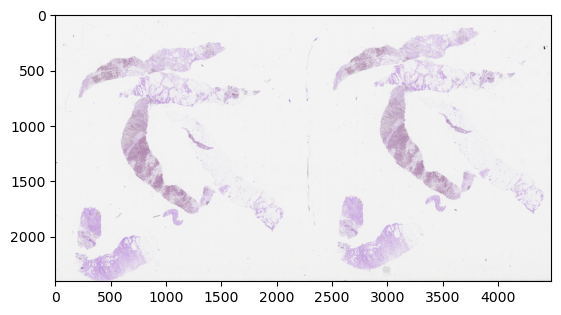

In [ ]:
# image load and save the shape
file = base_path + train_df['img_path'].iloc[652][1:]
image = cv2.imread(file)
y_orig, x_orig, channel= image.shape
print(x_orig, y_orig)


plt.imshow(image)
plt.show()

(2403, 4481)
(2, 8121)


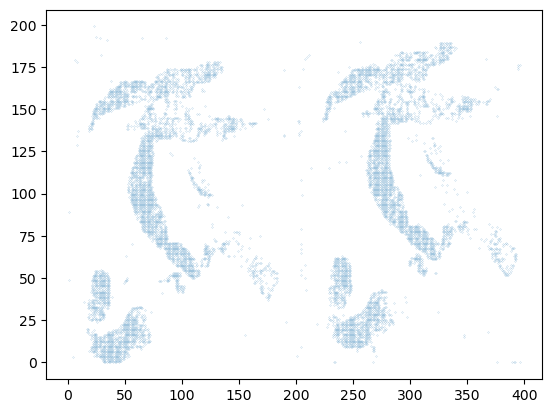

In [ ]:
# gray scale, resize, 좌표화
gray_sample = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(gray_sample.shape)
gray_sample =cv2.flip(gray_sample, 0)

gray_sample = cv2.resize(gray_sample, dsize=(400, 200), interpolation=cv2.INTER_LINEAR) 

mask = cv2.threshold(gray_sample, 235, 255, cv2.THRESH_BINARY)[1]

coord = np.where( gray_sample < 220 )
co_array = np.array(coord)
print(co_array.shape)

co_array = np.float32(co_array)

plt.scatter(co_array[1], co_array[0], s=1e-2 )

In [ ]:
from numpy.linalg import norm

#From t.ly/TLq_


class KMeans():
    def __init__(self, n_clusters, max_iter = 30, random_state = 60):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state
        
    def initialize_centroids(self, X): # center 초기화 - 이미지 내 특정 점으로 고정
        np.random.RandomState(self.random_state)
        random_idx = np.random.permutation(X.shape[0])
#         fixed_points = np.array(
#             [[X.shape[0]*2/5,  X.shape[0]*4/5 ,X.shape[1]*1/5, X.shape[1]*3/5], 
#             [X.shape[1]/2, X.shape[1]/2, X.shape[1]/2, X.shape[1]/2]]
#             , dtype = int)
#         centroids = fixed_points[:self.n_clusters]
        centroids = X[random_idx[:self.n_clusters]]
        return centroids
        
    def compute_centroids(self, X, labels): # centroids 계산 
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            centroids[k, :] = np.mean(X[labels == k, :], axis=0)
        return centroids
        
    def compute_distance(self, X, centroids): #
        distance = np.zeros((X.shape[0], self.n_clusters))
        for k in range(self.n_clusters):
            row_norm = norm(X - centroids[k, :], axis=1)
            distance[:, k] = np.square(row_norm)
        return distance
    
    def find_closest_cluster(self, distance):
        return np.argmin(distance, axis=1)
    
    def compute_sse(self, X, labels, centroids):
        distance = np.zeros(X.shape[0])
        for k in range(self.n_clusters):
            distance[labels == k] = norm(X[labels == k] - centroids[k], axis=1)
        return np.sum(np.square(distance))
    
    def fit(self, X):
        self.centroids = self.initialize_centroids(X)
 
        for i in range(self.max_iter):
            old_centroids = self.centroids
            distance = self.compute_distance(X, old_centroids)
            self.labels = self.find_closest_cluster(distance)
            self.centroids = self.compute_centroids(X, self.labels)
            if np.all(old_centroids == self.centroids):
                break
        self.error = self.compute_sse(X, self.labels, self.centroids)
        # return self.labels
        
    def predict(self, X):
        distance = self.compute_distance(X, self.centroids)
        return self.find_closest_cluster(distance)

In [ ]:
co_array =co_array.T

K=4 :  0.48734835
K=3 :  0.5456019


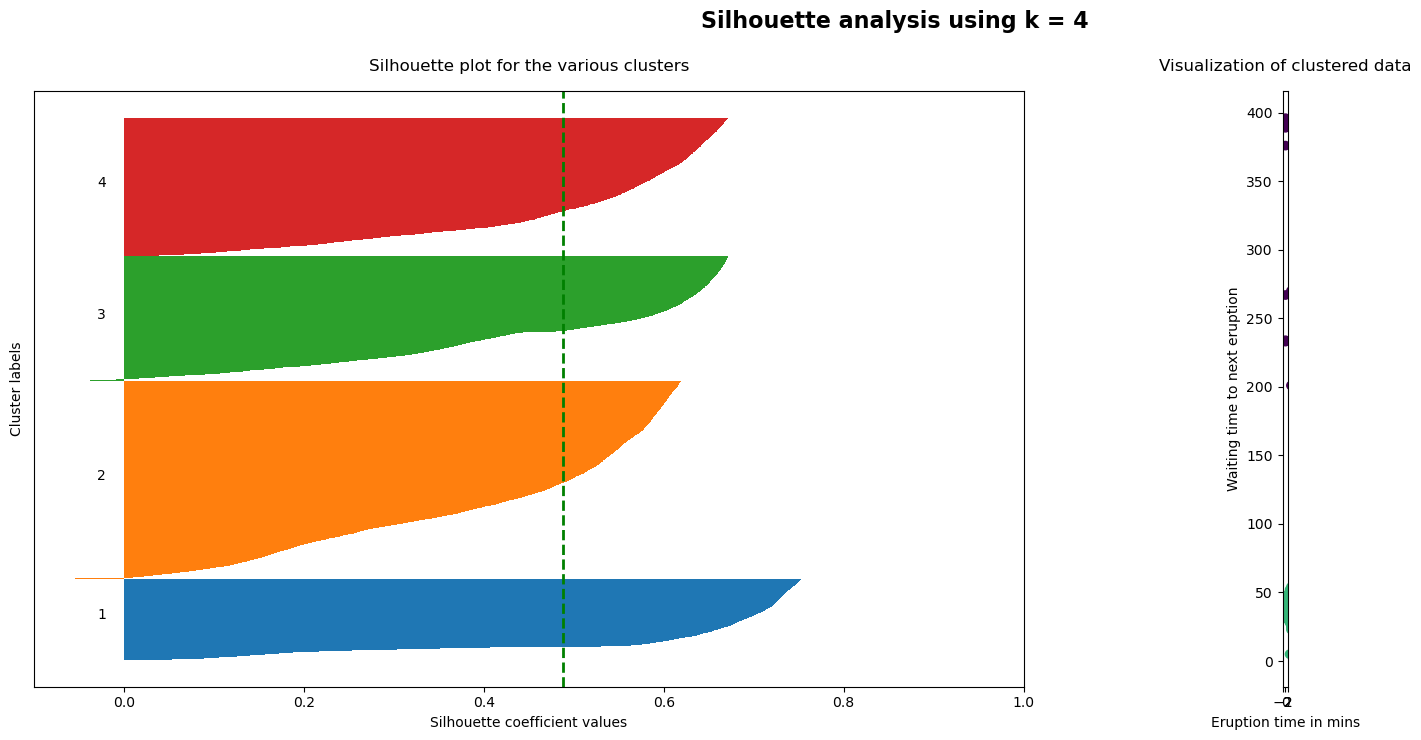

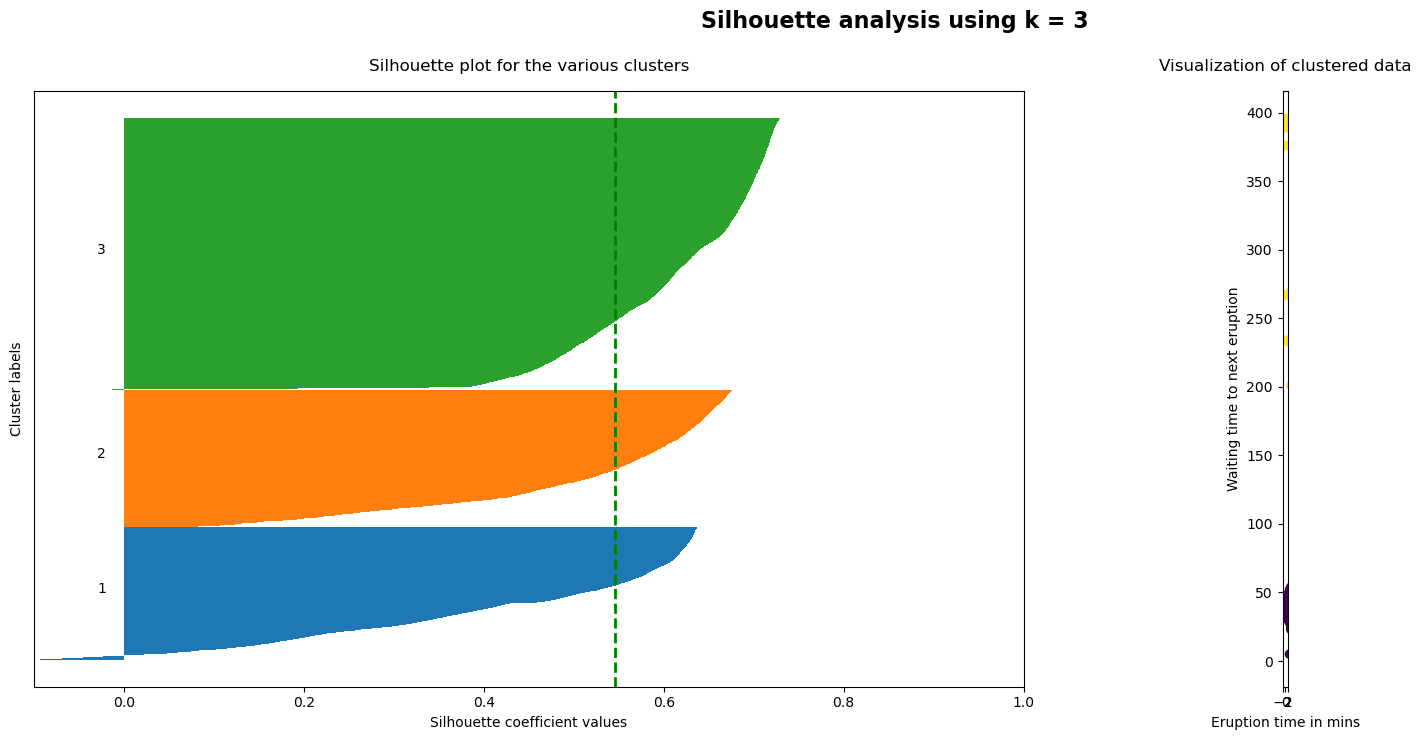

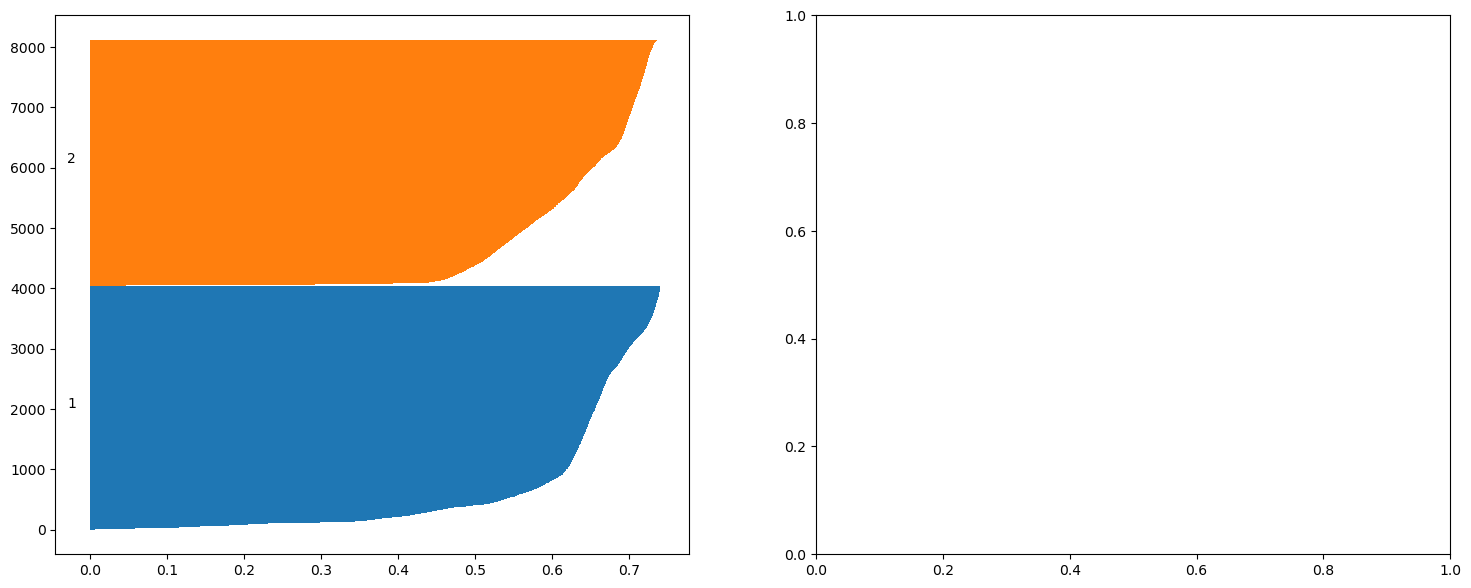

In [ ]:
# K mean evaluation with silhoueete analysis 
#data = co_array

from sklearn.metrics import silhouette_samples, silhouette_score

best_score = 0
best_k = 1
best_centroids = []

for i, k in enumerate([4, 3, 2]):

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    km.fit(co_array)
    labels = km.predict(co_array) # input data

    centroids = km.compute_centroids(co_array, labels) 

    # Get silhouette samples
    silhouette_vals = silhouette_samples(co_array, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals) ## score 

    if best_score < avg_score:
        if best_k == 3 and k ==2 and (avg_score-best_score) < 0.09:
            break
        best_score = avg_score
        best_k = k
        best_centroids = centroids
        x_coord = centroids[ : , 1]
        x_coord.sort()        
        if best_k == 2:
            x1, x2 = x_coord
        elif best_k ==3  :
            x1, x2, x3 = x_coord
        elif best_k ==4  :
            x1, x2, x3, x4 = x_coord
            
 
    ### 시각화
    print(f'K={k} : ', avg_score)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    # Scatter plot of data colored with labels
    ax2.scatter(co_array[:, 0], co_array[:, 1], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    ax2.set_xlim([-2, 2])
    ax2.set_xlim([-2, 2])
    ax2.set_xlabel('Eruption time in mins')
    ax2.set_ylabel('Waiting time to next eruption')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);



In [ ]:
best_centroids

array([[ 43.30757523,  68.15303802],
       [138.36079407,  79.27011108],
       [101.49742126, 282.93695068]])

[[ 91.52822113  73.68292236]
 [101.47537231 282.83926392]]


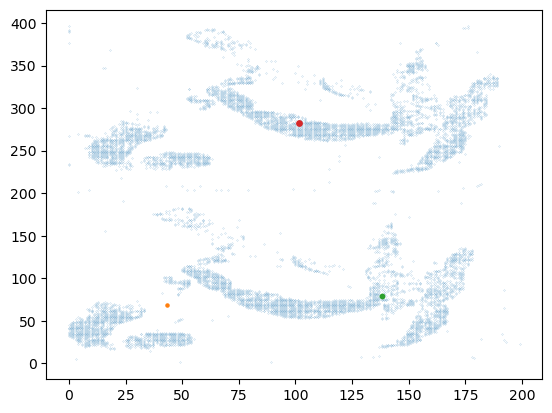

In [ ]:
print(centroids)

plt.scatter(co_array.T[0], co_array.T[1], s=1e-2 )
plt.scatter(best_centroids[0][0], best_centroids[0][1], s=5 )
plt.scatter(best_centroids[1][0], best_centroids[1][1], s=10 )
plt.scatter(best_centroids[2][0], best_centroids[2][1], s=15 )
#plt.scatter(centroids[3][0], centroids[3][1], s=20 )
plt.show()

In [ ]:
x1, x2, x3

(68.15303802490234, 79.27011108398438, 282.93695068359375)

-313 2089
825 2028


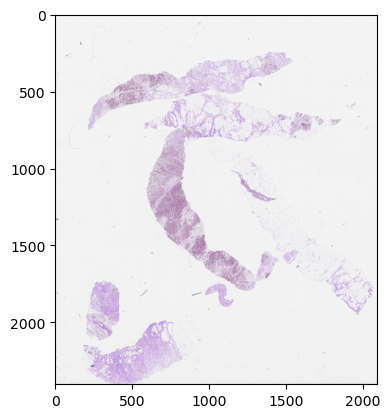

In [ ]:
# 좌표 재계산, crop

if best_k == 2:
    crop_image = image[:, : int( (x1+x2)/2  *x_orig / 400 ), :]
elif best_k > 2:
    # crop_image = image[:, int((x1+x2)/2 * x_orig/400): int((x2+x3/2)*x_orig/400), : ]
    # crop_image = image[:, int((x1+x3)/2 * x_orig/400) : , : ] #x1, x3 사이가 중간점
    alpha = int(y_orig / 2)
    print(int(x2 *x_orig /400) -alpha  , int(x2 *x_orig /400) +alpha  )
    print(int(((x1+x2)/2) * x_orig/400) , int(((x2+x3)/2)*x_orig/400))
    crop_image = image[:, max(0, int(x2 *x_orig /400) -alpha)  :int(x2 *x_orig /400) +alpha  , : ]
#     except ValueError: # almost ValueError
#         crop_image = image[:, int(((x1+x2)/2) * x_orig/400) : int(((x2+x3)/2)*x_orig/400), : ]

# 문제점 : 셋 중 하나가 0이 될 경우가 생김 
   # except: 
     #   crop_image = image[:, : int( (x1+x2)/2  *x_orig / 400 ), :]
plt.imshow(crop_image)
plt.show()